> Our Goal : is to build a model that can predict whether the loan application of an individual will get approved or not.
    
> It is a problem of Classification as we have to classify whether the Loan Application Status is 'Yes' or 'No'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

We have 614 records and 13 features(predictors).

In [5]:
# Checking the information about the data:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- From the above output of info(), we observe that Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History are having NULL values.

-In total there are 13 columns out of which only 5 are numeric and other 8 are categorical variables.

In [6]:
# Finding the number of missing values in each column:

dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values of the columns:
    
Gender: 13, Married: 3, Dependents: 15, Self_Employed: 32, LoanAmount: 22, Loan_Amount_Term: 14, Credit_History: 50

* Where, Gender, Married, Self_Employed are categorical variables and are imputed by their respective mode.
* And LoanAmount, Loan_Amount_Term and Credit_History are numerical variables are imputed by their respective means.

#First, removing missing values of categorical columns :

In [7]:
# 1. Gender , is a categorical column so missing value would be replaced by its mode :

dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
dataset['Gender'] = dataset.Gender.fillna('Male')

In [9]:
dataset['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [10]:
# 2. Married, is a categorical column so missing value would be replaced by its mode :

dataset['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
dataset['Married'] = dataset.Married.fillna('Yes')

In [12]:
dataset['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [13]:
# 3. Self_Employed

dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
dataset['Self_Employed'] = dataset.Self_Employed.fillna('No')

In [15]:
dataset['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Now, Removing missing values of numerical columns:

In [16]:
# Removing missing values of LoanAmount by its mean:

dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [17]:
dataset['LoanAmount'].isnull().sum()

0

In [18]:
# Removing missing values of Loan_Amount_Term by its mean:

dataset['Loan_Amount_Term'] = dataset["Loan_Amount_Term"].fillna(dataset['Loan_Amount_Term'].mean())

In [19]:
dataset['Loan_Amount_Term'].isnull().sum()

0

In [20]:
#  Dependents, if we see number of dependents should be an integer, however in our dataset its an 'Object' data type:
# Before treating it we will check the values it contains:

dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Here, Dependents are having some values as 3+ which means an individual is having more than 3 dependents.

In [21]:
# With '+' sign we cannot move ahead, so remove the + sign and consider the number of dependents as 3.
# to remove '+' :

dataset['Dependents'] = dataset['Dependents'].str.replace(r'\D', '')

In [22]:
dataset['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [23]:
# checking the data type of Dependents column:

dataset['Dependents'].dtypes

dtype('O')

In [24]:
# changing the data type of Dependents column:

dataset["Dependents"] = dataset["Dependents"].astype(str).astype(float)

In [25]:
dataset['Dependents'] .isnull().sum()

15

In [26]:
dataset['Dependents'].dtypes

dtype('float64')

In [27]:
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mean())

In [28]:
dataset['Dependents'] .isnull().sum()

0

In [29]:
# As number of dependents cannot be in float, hence changing the type to int:

dataset['Dependents'] = dataset['Dependents'].astype(int)

In [30]:
dataset['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [31]:
# Credit_History

dataset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [32]:
dataset['Credit_History'].isnull().sum()

50

In [33]:
dataset['Credit_History'] = dataset.Credit_History.fillna(1.0)

In [34]:
dataset['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [35]:
dataset['Credit_History'].isnull().sum()

0

In [36]:
# now, checking is there any missing values in the dataset:

dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

SO, WE HAVE SUCCESSFULLY REMOVED ALL THE MISSING VALUES.

#Now, checking for the OUTLIERS:

BOXPLOT

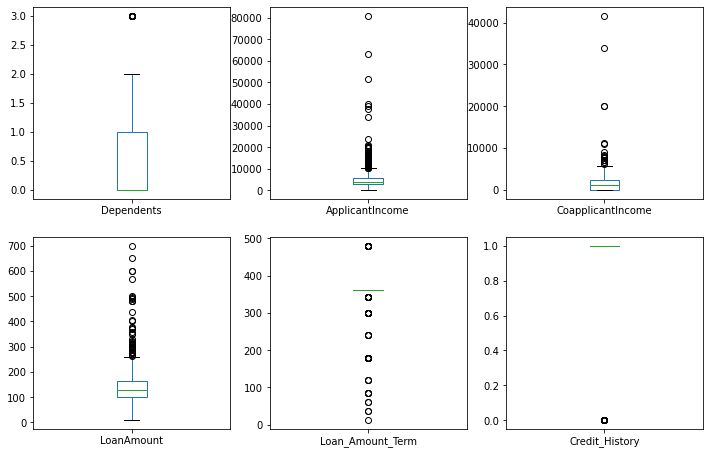

In [37]:
dataset.plot(kind = 'box', figsize = (12,12), layout = (3,3), sharex = False, subplots = True);

#Checking the distribution of dataset:

#HISTOGRAM

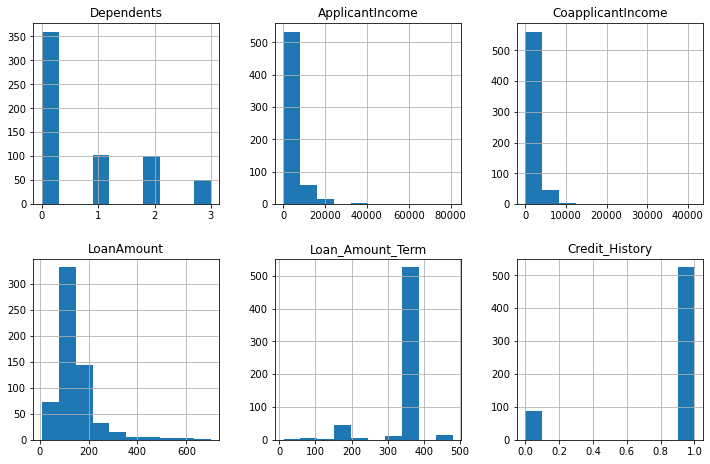

In [38]:
dataset.hist(figsize=(12,12), layout=(3,3), sharex=False);

In [40]:
import seaborn as sns

<AxesSubplot:xlabel='Education', ylabel='count'>

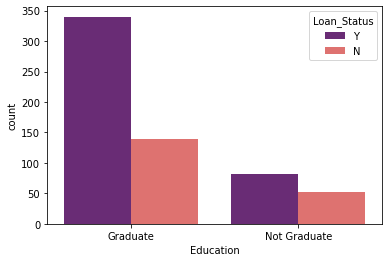

In [41]:
sns.countplot(dataset['Education'], hue = 'Loan_Status', data = dataset, palette = 'magma')

<AxesSubplot:xlabel='Married', ylabel='count'>

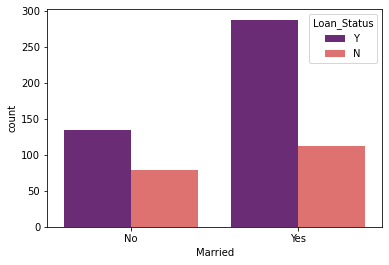

In [42]:
sns.countplot(dataset['Married'], hue = 'Loan_Status', data = dataset, palette = 'magma')

<AxesSubplot:xlabel='Gender', ylabel='count'>

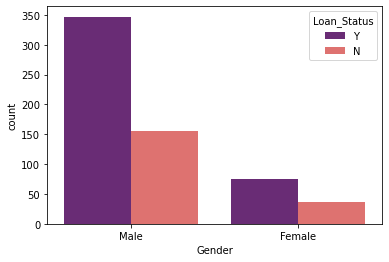

In [43]:
sns.countplot(dataset['Gender'], hue = 'Loan_Status', data = dataset, palette = 'magma')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

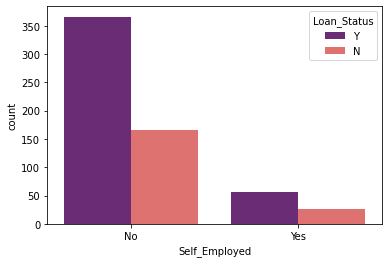

In [44]:
sns.countplot(dataset['Self_Employed'], hue = 'Loan_Status', data = dataset, palette = 'magma')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

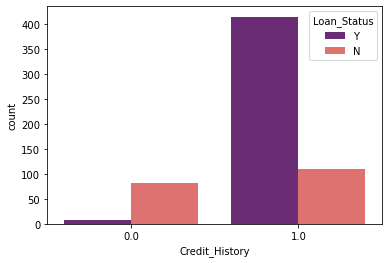

In [45]:
sns.countplot(dataset['Credit_History'], hue = 'Loan_Status', data = dataset, palette = 'magma')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

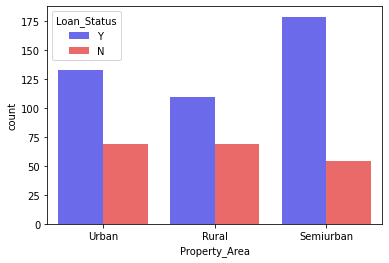

In [46]:
sns.countplot(dataset['Property_Area'], hue = 'Loan_Status', data = dataset, palette = 'seismic')

In [47]:
# checking the correlation between variables:

dataset.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.040160,-0.018615,0.011134,-0.001431,0.000432,1.000000


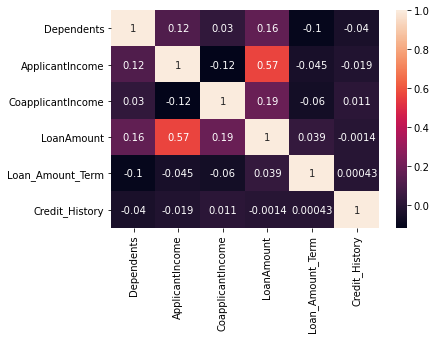

In [48]:
# HEATMAP

sns.heatmap(dataset.corr(), annot=True);

Dealing with Outliers:

   As, we have seen that there are some outliers in our dataset, but here we cannot remove those outliers as the size of our dataset is already small.

CONVERTING CATEGORICAL VARIABLES INTO NUMERIC :

In [49]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

Categorical_feature = ['Gender','Education', 'Married', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in Categorical_feature:
    dataset[i] = le.fit_transform(dataset[i])

In [63]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


FEATURE SELECTION:

In [64]:
X = dataset.iloc[:, 1:12]    # Loan id is not of use for the study
Y = dataset.iloc[:, 12]

In [65]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [66]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

SPLITTING DATA

In [67]:
#now, we will split the dataset into two parts for training and testing in the ratio of 80:20 -

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0 )

In [68]:
# to check splitting has been done :

X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,0,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,0,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,0,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,0,0,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,2,0,1,2500,4600.0,176.0,360.0,1.0,0
376,1,1,3,0,0,8750,4996.0,130.0,360.0,1.0,0
278,1,1,0,0,0,14583,0.0,436.0,360.0,1.0,1
466,1,1,3,1,0,2947,1664.0,70.0,180.0,0.0,2


Model Fitting:

1. DecisionTreeClassifier
2. Logistic Regression
3. Random Forest Classifier

In [69]:
#1. DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [70]:
# creating Decision Tree classifier object:

model = DecisionTreeClassifier()

In [71]:
# Train Decision Tree Classifier

model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [72]:
# prediction of Y_test

Y_pred = model.predict(X_test)

In [73]:
Y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

Model Evaluation

In [74]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[17, 16],
       [22, 68]], dtype=int64)

In [75]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6910569105691057


So, we got the accuracy of DecisionTreeClassifier as 69.10% .

Now, we will check for another model with better accuracy score.

In [76]:
# Fitting Model 2. Logistic Regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

In [77]:
Y_predict = logistic_regression.predict(X_test)

In [78]:
Y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

Model Evaluation using Confusion matrix

In [79]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predict)
cnf_matrix

array([[15, 18],
       [ 3, 87]], dtype=int64)

In [80]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predict))

Accuracy: 0.8292682926829268


Here, we get the accuracy rate as 82.93% which is much better than DecisionTreeClassifier.

Visualization of Confusion Matrix using Heatmap

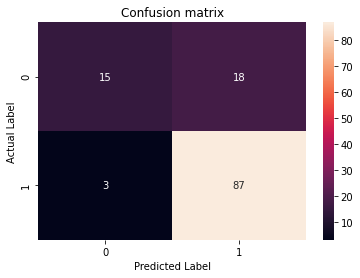

In [81]:
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<AxesSubplot:>

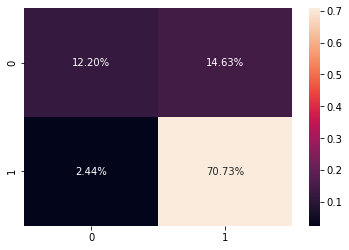

In [82]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt = '.2%')

In [ ]:
So, for Loan Application status prediction :
    
Y_predict = logistic_regression.predict(X_test)

model gives fairly significant results.

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

model1 = rfc.fit(X_train,Y_train)

Y_predict2 = model1.predict(X_test)

In [84]:
Y_predict2

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [85]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predict2))

Accuracy: 0.7886178861788617


In [86]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predict2)
cnf_matrix

array([[15, 18],
       [ 8, 82]], dtype=int64)

In [ ]:
As per above all calculations we find that LogisticRegrssion Model gets the highest accuracy rate as 82.93% .